In [1]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()

# for calculations
import numpy as np
import math

import time

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

from PIL import Image # for converting plots to black-and-white

from ipynb.fs.full.MyFunctions_00 import *

## Create Colors Dataframes

In [2]:
# read in the files for ALLWISE matches from void and wall galaxies from SDSS
# older files used 10" matching radius, while new files use 6"
voids_6arc = read_data('IPAC_Results/New/Voids/new_voids_AWSource')
walls_6arc = read_data('IPAC_Results/New/Walls/new_walls_AWSource')

voids_6arc = voids_6arc.rename(columns = {'nsaid_01' : 'object_tag'})
walls_6arc = walls_6arc.rename(columns = {'nsaid_01' : 'object_tag'})

voids_6arc.head()

read IPAC_Results/New/Voids/new_voids_AWSource
read IPAC_Results/New/Walls/new_walls_AWSource


,cntr_01,dist_x,pang_x,object_tag,ra_01,dec_01,ra,dec,w1mpro,w1sigmpro,w1snr,w2mpro,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr
0,1,0.151786,98.322261,52,146.594503,-0.133150,146.594545,-0.133156,15.346,0.040,27.2,15.241,0.095,11.5,11.979,NaN,1.2,8.623,NaN,0.8
1,2,2.434494,-81.609628,75,145.874464,-0.608775,145.873795,-0.608677,14.144,0.043,25.2,14.034,0.057,19.1,10.802,0.124,8.7,8.286,0.435,2.5
2,3,0.173687,-28.459110,95,146.222266,-0.375920,146.222243,-0.375877,13.238,0.025,44.0,13.075,0.029,37.9,9.610,0.044,24.9,8.194,0.273,4.0
3,4,0.036896,45.446259,121,145.681110,-0.867233,145.681118,-0.867226,13.040,0.024,46.2,13.006,0.027,39.9,11.039,0.139,7.8,8.913,NaN,-0.5
4,5,2.015983,83.997238,127,145.759730,-0.813891,145.760287,-0.813832,13.355,0.051,21.4,13.228,0.058,18.7,10.507,0.120,9.1,7.438,NaN,1.4


In [3]:
# filter tables from walls and voids for both matching radii

print(len(voids_6arc))
voids_filtered = filter_colors(voids_6arc)
print(len(voids_filtered))

print("")

print(len(walls_6arc))
walls_filtered = filter_colors(walls_6arc)
print(len(walls_filtered))

86891
84676

245778
242531


In [4]:
# for both groups, calcuate a new column containing two colors for each galaxy
# calculate the mean and standard deviation of both colors for later plotting
voids_colors = voids_filtered

voids_colors['W1-W2'] = voids_filtered.w1mpro - voids_filtered.w2mpro
voids_colors['W2-W3'] = voids_filtered.w2mpro - voids_filtered.w3mpro
voids_colors = voids_colors.rename(columns = {"object_tag_01": "object_tag"})

walls_colors = walls_filtered

walls_colors['W1-W2'] = walls_filtered.w1mpro - walls_filtered.w2mpro
walls_colors['W2-W3'] = walls_filtered.w2mpro - walls_filtered.w3mpro
walls_colors = walls_colors.rename(columns = {"object_tag_01": "object_tag"})

In [5]:
for col in walls_colors.columns:
    print(col)
walls_colors.head()

cntr_01
dist_x
pang_x
object_tag
ra_01
dec_01
ra
dec
w1mpro
w1sigmpro
w1snr
w2mpro
w2sigmpro
w2snr
w3mpro
w3sigmpro
w3snr
w4mpro
w4sigmpro
w4snr
W1-W2
W2-W3


,cntr_01,dist_x,pang_x,object_tag,ra_01,dec_01,ra,dec,w1mpro,w1sigmpro,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
0,1,0.621310,-88.040692,464,148.728855,0.188863,148.728682,0.188869,14.783,0.035,...,0.057,19.2,10.944,0.128,8.5,8.427,0.377,2.9,0.301,3.538
1,2,0.067083,-153.002538,570,147.428682,1.107487,147.428674,1.107470,13.279,0.024,...,0.028,39.3,11.477,0.211,5.1,8.779,NaN,0.4,0.142,1.660
2,3,0.147374,74.127786,572,147.511343,1.100596,147.511382,1.100608,14.043,0.028,...,0.042,25.9,11.941,NaN,0.8,9.017,NaN,-0.5,0.068,2.034
3,4,0.024719,-59.380482,576,147.561502,1.229841,147.561496,1.229845,13.677,0.026,...,0.032,33.5,10.517,0.086,12.6,7.995,NaN,1.8,0.178,2.982
4,5,0.052153,-119.381587,615,148.015821,1.148428,148.015808,1.148420,13.925,0.026,...,0.038,28.8,12.296,NaN,1.0,9.303,NaN,-0.8,0.018,1.611


## Merge Colors into Groups

In [6]:
# read in saved Pr tables
voids_parent = read_data_db('voids_parent_' + 'new_' + '04-11-23') # timestamp())
walls_parent = read_data_db('walls_parent_' + 'new_' + '04-11-23') # timestamp())

voids_bright = read_data_db('voids_bright_' + 'new_' + '04-11-23') # timestamp())
walls_bright = read_data_db('walls_bright_' + 'new_' + '04-11-23') # timestamp())

voids_main = read_data_db('voids_main_' + 'new_' + '04-11-23') # timestamp())
walls_main = read_data_db('walls_main_' + 'new_' + '04-11-23') # timestamp())

voids_dwarf = read_data_db('voids_dwarf_' + 'new_' + '04-11-23') # timestamp())
walls_dwarf = read_data_db('walls_dwarf_' + 'new_' + '04-11-23') # timestamp())

read voids_parent_new_04-11-23
read walls_parent_new_04-11-23
read voids_bright_new_04-11-23
read walls_bright_new_04-11-23
read voids_main_new_04-11-23
read walls_main_new_04-11-23
read voids_dwarf_new_04-11-23
read walls_dwarf_new_04-11-23


In [7]:
# read old files
# voids_parent_new_02-19-23

voids_parent_old = read_data('Code_SixArcsec/voids_parent_' + 'new_' + '02-19-23') # timestamp())
walls_parent_old = read_data('Code_SixArcsec/walls_parent_' + 'new_' + '02-19-23') # timestamp())

voids_bright_old = read_data('Code_SixArcsec/voids_bright_' + 'new_' + '02-19-23') # timestamp())
walls_bright_old = read_data('Code_SixArcsec/walls_bright_' + 'new_' + '02-19-23') # timestamp())

voids_main_old = read_data('Code_SixArcsec/voids_main_' + 'new_' + '02-19-23') # timestamp())
walls_main_old = read_data('Code_SixArcsec/walls_main_' + 'new_' + '02-19-23') # timestamp())

voids_dwarf_old = read_data('Code_SixArcsec/voids_dwarf_' + 'new_' + '02-19-23') # timestamp())
walls_dwarf_old = read_data('Code_SixArcsec/walls_dwarf_' + 'new_' + '02-19-23') # timestamp())

read Code_SixArcsec/voids_parent_new_02-19-23
read Code_SixArcsec/walls_parent_new_02-19-23
read Code_SixArcsec/voids_bright_new_02-19-23
read Code_SixArcsec/walls_bright_new_02-19-23
read Code_SixArcsec/voids_main_new_02-19-23
read Code_SixArcsec/walls_main_new_02-19-23
read Code_SixArcsec/voids_dwarf_new_02-19-23
read Code_SixArcsec/walls_dwarf_new_02-19-23


In [8]:
voids_parent_nona = merge_nona(voids_parent, voids_colors)
walls_parent_nona = merge_nona(walls_parent, walls_colors)

voids_bright_nona = merge_nona(voids_bright, voids_colors)
walls_bright_nona = merge_nona(walls_bright, walls_colors)

voids_main_nona = merge_nona(voids_main, voids_colors)
walls_main_nona = merge_nona(walls_main, walls_colors)

voids_dwarf_nona = merge_nona(voids_dwarf, voids_colors)
walls_dwarf_nona = merge_nona(walls_dwarf, walls_colors)

fraction lost = 0.001555
fraction lost = 0.001448
fraction lost = 0.001325
fraction lost = 0.001365
fraction lost = 0.001737
fraction lost = 0.001545
fraction lost = 0.001393
fraction lost = 0.001852


In [9]:
voids_parent_nona_old = merge_nona(voids_parent_old, voids_colors)
walls_parent_nona_old = merge_nona(walls_parent_old, walls_colors)

voids_bright_nona_old = merge_nona(voids_bright_old, voids_colors)
walls_bright_nona_old = merge_nona(walls_bright_old, walls_colors)

voids_main_nona_old = merge_nona(voids_main_old, voids_colors)
walls_main_nona_old = merge_nona(walls_main_old, walls_colors)

voids_dwarf_nona_old = merge_nona(voids_dwarf_old, voids_colors)
walls_dwarf_nona_old = merge_nona(walls_dwarf_old, walls_colors)

# checks out from 26_ file from 6arcsec

fraction lost = 0.003735
fraction lost = 0.003304
fraction lost = 0.002739
fraction lost = 0.00288
fraction lost = 0.004156
fraction lost = 0.00378
fraction lost = 0.02288
fraction lost = 0.009381


Check W2-W3 for nan values *not checked in the merge_nona function (only nan in W1-W2)

In [12]:
print(len(voids_parent_nona))
voids_parent_nona_w3 = voids_parent_nona.dropna(subset = ['W2-W3'])
print(len(voids_parent_nona_w3))
print()
print(len(voids_parent_nona_old))
voids_parent_nona_w3_old = voids_parent_nona_old.dropna(subset = ['W2-W3'])
print(len(voids_parent_nona_w3_old))

71261
71259

71211
71209


In [13]:
print(len(walls_parent_nona))
walls_parent_nona_w3 = walls_parent_nona.dropna(subset = ['W2-W3'])
print(len(walls_parent_nona_w3))
print()
print(len(walls_parent_nona_old))
walls_parent_nona_w3_old = walls_parent_nona_old.dropna(subset = ['W2-W3'])
print(len(walls_parent_nona_w3_old))

219255
219253

219324
219322


Find source of increasing numbers
### Happens in walls, too!

In [10]:
print(len(voids_parent_nona)) # outlier! (#3arcsec > #6arcsec)
print(len(voids_parent_nona_old))
print()
print('voids breakdown:')
print()
print(len(voids_bright_nona))
print(len(voids_bright_nona_old))
print()
print(len(voids_main_nona)) # outlier! (#3arcsec > #6arcsec)
print(len(voids_main_nona_old))
print()
print(len(voids_dwarf_nona))
print(len(voids_dwarf_nona_old))

71261
71211

voids breakdown:

30898
30946

39646
39539

717
726


In [11]:
print(len(walls_parent_nona_old))
print()
print('walls breakdown:')
print()
print(len(walls_bright_nona))
print(len(walls_bright_nona_old))
print()
print(len(walls_main_nona)) # outlier! (#3arcsec > #6arcsec)
print(len(walls_main_nona_old))
print()
print(len(walls_dwarf_nona)) # outlier! (#3arcsec > #6arcsec)
print(len(walls_dwarf_nona_old))

219324

walls breakdown:

119212
119429

99504
99367

539
528


## Find which galaxies appear only in new, not old

In [104]:
new = voids_parent_nona
old = voids_parent_nona_old

old.head()

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
0,75.0,22.0,0.911982,1,145.874464,-0.608775,266,138,51630,-20.979137,...,0.057,19.1,10.802,0.124,8.7,8.286,0.435,2.5,0.110,3.232
1,95.0,22.0,0.792304,1,146.222266,-0.375920,266,168,51630,-20.544321,...,0.029,37.9,9.610,0.044,24.9,8.194,0.273,4.0,0.163,3.465
2,121.0,21.0,0.969972,1,145.681110,-0.867233,266,207,51630,-21.178394,...,0.027,39.9,11.039,0.139,7.8,8.913,NaN,-0.5,0.034,1.967
3,127.0,20.0,0.998402,1,145.759730,-0.813891,266,216,51630,-20.736423,...,0.058,18.7,10.507,0.120,9.1,7.438,NaN,1.4,0.127,2.721
4,128.0,20.0,0.725205,1,145.708927,-0.747680,266,217,51630,-19.849358,...,0.041,26.8,12.431,NaN,0.0,8.759,NaN,-0.6,0.166,1.533


In [105]:
print(len(new[(new['num_obj'] < 4)]))
print(len(old[(old['num_obj'] < 4)]))

0
0


In [106]:
print(len(old['object_tag']))
print(len(old['object_tag'].drop_duplicates()))
print()
print(len(new['object_tag']))
print(len(new['object_tag'].drop_duplicates()))
print()

old_tags = old['object_tag'].tolist()
new_tags = new['object_tag'].tolist()

print(type(old['object_tag'].tolist()))

71211
71211

71261
71261

<class 'list'>


In [109]:
new_only = new[~new['object_tag'].isin(old_tags)]
old_only = old[~old['object_tag'].isin(new_tags)]

print(len(new))
print(len(new_only))
print()
print(len(old))
print(len(old_only))

# 50 difference between voids_main and voids_main_old

71261
384

71211
334


In [110]:
new_only.sample(20)

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
17534,191851.0,6.0,0.117072,1,143.321475,5.596245,992,518,52644,-17.991884,...,0.074,14.7,11.503,0.243,4.5,8.698,NaN,0.3,0.251,3.396
67917,592982.0,4.0,0.284703,1,126.133548,3.879563,4762,162,55888,-18.078716,...,0.086,12.6,10.706,0.118,9.2,8.553,NaN,0.2,0.243,4.251
15677,176016.0,4.0,-0.999283,1,145.383327,41.376532,940,16,52670,-16.501575,...,0.072,15.0,12.131,NaN,1.4,9.081,NaN,-0.6,0.195,2.882
53398,474009.0,4.0,0.894376,1,168.473011,26.632515,2214,467,53794,-19.241898,...,0.078,13.9,11.250,0.158,6.9,8.470,NaN,1.4,0.109,3.767
65822,560167.0,4.0,-0.223875,1,217.680248,17.640718,2761,339,54534,-17.693317,...,0.065,16.7,11.877,0.187,5.8,8.912,0.342,3.2,0.079,3.184
37442,355898.0,4.0,-0.831646,1,235.776003,9.196272,1724,447,53859,-18.824139,...,0.071,15.4,11.797,0.281,3.9,8.621,NaN,1.0,0.161,3.150
18932,208707.0,4.0,-0.649173,1,214.687372,52.131947,1045,579,52725,-18.313339,...,0.067,16.3,12.670,0.391,2.8,8.929,NaN,1.1,-0.012,2.620
68804,623586.0,4.0,0.560668,1,149.392976,36.024371,0,0,0,-16.625628,...,0.080,13.5,11.926,NaN,1.5,8.469,NaN,1.2,0.002,3.075
4000,63414.0,4.0,-0.001917,1,209.975747,64.542751,498,236,51984,-19.130617,...,0.053,20.6,11.227,0.086,12.7,7.703,0.096,11.3,0.441,4.082
2680,50684.0,4.0,-0.492236,1,132.218665,51.759115,447,172,51877,-17.811794,...,0.100,10.8,11.995,0.328,3.3,8.388,NaN,1.3,0.306,3.428


In [111]:
old_only.sample(20)

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
66501,566781.0,5.0,0.293285,1,228.454898,16.327741,2780,135,54557,-18.189789,...,0.138,7.9,12.219,NaN,1.8,9.030,NaN,0.8,-0.035,3.659
47776,430125.0,5.0,0.421598,1,158.891434,31.939872,2019,303,53430,-18.511137,...,0.084,13.0,12.310,0.386,2.8,8.318,NaN,0.8,0.381,2.920
10836,138957.0,4.0,0.866794,1,225.786900,54.185482,793,289,52370,-19.419416,...,0.066,16.4,11.835,0.166,6.5,8.977,NaN,1.0,0.170,3.426
69527,633654.0,4.0,-0.574146,1,251.988451,34.831034,1175,545,52791,-18.361303,...,0.089,12.2,12.258,NaN,1.4,9.267,NaN,0.1,-0.052,3.380
67958,591828.0,21.0,0.643766,1,178.381192,36.005610,4650,681,55648,-21.459055,...,0.033,33.1,9.808,0.052,21.0,8.177,0.425,2.6,0.139,3.255
68792,622749.0,20.0,-0.116227,1,128.980722,-0.459891,0,0,0,-20.416706,...,0.075,14.4,11.058,0.229,4.7,8.364,0.506,2.1,0.016,3.095
4226,65229.0,4.0,-0.249041,1,161.249584,1.485382,506,144,52022,-20.011904,...,0.082,13.3,11.268,0.185,5.9,8.784,NaN,-0.8,0.336,3.745
6831,83696.0,4.0,-0.225160,1,154.028433,3.939687,574,168,52355,-18.931997,...,0.121,9.0,12.440,0.501,2.2,8.564,NaN,1.5,0.015,2.954
41487,386063.0,13.0,0.208928,1,228.424444,6.933429,1818,319,54539,-16.382734,...,0.080,13.5,12.809,0.448,2.4,9.325,NaN,-0.6,0.356,2.121
10215,134127.0,5.0,0.984529,1,173.527984,62.009614,776,200,52319,-19.374779,...,0.072,15.1,11.991,0.259,4.2,9.083,NaN,0.5,0.147,3.270


In [113]:
# test
a = range(int(4))
a

range(0, 4)

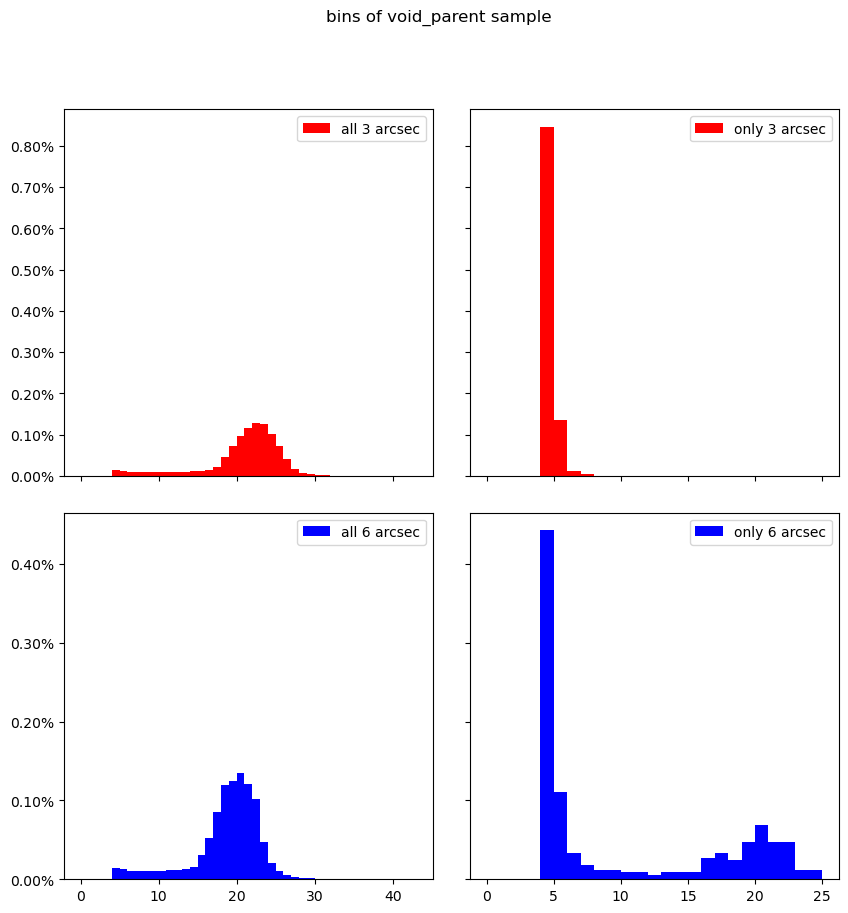

In [122]:
# x = new['num_obj']
# max_obj = int(new['num_obj'].max())

# print(max_obj)

# plt.hist(x, bins = range(max_obj))
# plt.show()

fig, axs = plt.subplots(2, 2, 
                        sharex = 'col', 
                        sharey = 'row',
                        figsize = (10, 10))

plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
axs[0, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))
axs[1, 0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 2))

# 0, 0 = top left
# 1, 0 = top right
# 1, 0 = bottom left
# 1, 1 = bottom right

fig.suptitle('bins of void_parent sample')

axs[0, 0].hist(new['num_obj'],
               weights = np.ones_like(new['num_obj']) / len(new['num_obj']),
               bins = range(int(max(new['num_obj'].max(), old['num_obj'].max())) + 1),
               label = 'all 3 arcsec',
               color = 'red'
              )

axs[0, 1].hist(new_only['num_obj'],
               weights = np.ones_like(new_only['num_obj']) / len(new_only['num_obj']),
               bins = range(int(max(new_only['num_obj'].max(), old_only['num_obj'].max())) + 1),
               label = 'only 3 arcsec',
               color = 'red'
              )

axs[1, 0].hist(old['num_obj'],
               weights = np.ones_like(old['num_obj']) / len(old['num_obj']),
               bins = range(int(max(new['num_obj'].max(), old['num_obj'].max())) + 1),
               label = 'all 6 arcsec',
               color = 'blue'
              )

axs[1, 1].hist(old_only['num_obj'],
               weights = np.ones_like(old_only['num_obj']) / len(old_only['num_obj']),
               bins = range(int(max(new_only['num_obj'].max(), old_only['num_obj'].max())) + 1),
               label = 'only 6 arcsec',
               color = 'blue'
              )

axs[1, 0].legend(loc = 'upper right')
axs[1, 1].legend(loc = 'upper right')
axs[0, 0].legend(loc = 'upper right')
axs[0, 1].legend(loc = 'upper right')

plt.show()